# 1.Opis problemu
### a)Opis zbioru danych, cech i źródło danych
---
##### Nazwa: Diabetes 130-US hospitals for years 1999-2008
##### Opis: Zbiór danych przedstawia ***dziesięć lat*** (1999-2008) opieki klinicznej w 130 amerykańskich szpitalach i zintegrowanych sieciach dostaw. Każdy wiersz dotyczy dokumentacji szpitalnej pacjentów, u których zdiagnozowano cukrzycę, którzy przeszli badania laboratoryjne, leki i przebywali w szpitalu do 14 dni.
##### Cechy:
#####      + Charakterystyka zestawu danych: **Multivariate**
#####      + Obszar tematyczny: **Zdrowie i medycyna**
#####      + Typ elementu: **Categorical, Integer**
#####      + Ma brakujące wartości?: **Tak**
#### Cel: Głównym celem projektu jest określenie ryzyka ponownej hospitalizacji pacjentów w ciągu 30 dni od momentu ich wypisu ze szpitala.
##### **Dlaczego to jest ważne?**
##### <> Niewystarczająca opieka diabetologiczna przyczynia się do wyższych kosztów związanych z kolejnymi hospitalizacjami, zwiększa ryzyko powikłań oraz negatywnie wpływa na zdrowie i bezpieczeństwo pacjentów, prowadząc do większej liczby przypadków zachorowalności i zgonów. 

##### <> Pomimo dostępnych dowodów, które jasno wskazują na poprawę stanu zdrowia pacjentów z cukrzycą poddawanych odpowiednim działaniom terapeutycznym i profilaktycznym, wielu z nich nie korzysta z tych interwencji.Często wynika to z braku spójnego i skutecznego zarządzania leczeniem cukrzycy w szpitalach, co skutkuje niedostatecznym monitorowaniem poziomu glukozy we krwi.

#### (Variables Name)Atrybuty zbioru danych
- **patient_nbr**: Unikalny numer identyfikacyjny przypisany każdemu pacjentowi.
- **race**:Przynależność rasowa lub etniczna pacjenta.
- **gender**: Płeć pacjenta, może być mężczyzna, kobieta lub inna.
- **age**: Kategoria wiekowa, do której należy pacjent.
- **admission_type_id**: Określenie sposobu przyjęcia pacjenta do szpitala (planowe, pilne, nagłe).
- **time_in_hospital**: Całkowita liczba dni, które pacjent spędził w szpitalu.
- **medical_specialty**: Specjalizacja medyczna lekarza, który opiekował się pacjentem.
- **num_lab_procedures**: Łączna liczba wykonanych procedur laboratoryjnych.
- **A1Cresult**: Wartość wskaźnika hemoglobiny glikowanej, wskazująca poziom kontroli glikemii.
- **diag(1,2,3)**: Diagnozy podczas hospitalizacji.
- **num_medications**: Całkowita liczba leków przepisanych pacjentowi
- **Leki przeciwcukrzycowe**: Leki stosowane w leczeniu cukrzycy.
- **number_outpatient,number_emergency,number_inpatient**: Liczba wizyt pacjenta w placówkach ambulatoryjnych, nagłych i szpitalnych w roku poprzedzającym hospitalizację.
---
#### b)Załadowanie potrzebnych bibliotek

In [197]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

#### c)Załadowanie zbioru danych do lokalnego katalogu

In [198]:
diabetes = pd.read_csv('dane/diabetic_data.csv')

# 2.Opis danych
### a)Statystyki opisowe
---
#### Wyświetlam pierwsze pięc wierszy zbioru danych "diabets" , dla szybkiego wglądu w strukturę kolumn i wartości w datasetcie

In [199]:
diabetes.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


---
Możemy odrazu zauważyć, iż wartość weight jest nieznana w przypadkach które widzimy

In [200]:
diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


---
#### Generuję statystyki opisowe dla zbioru danych "diabetes", takie jak średnia, odchylenie standardowe wartości minimalne, maksymalne oraz kwartyle, dla zmiennych numerycznych

In [201]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


---
#### Pokazuję ogólną informację o zbiorze danych, w tym typy danych , liczbę nie-nullowych wartości i td.

In [202]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

---
### Przygotowanie danych

---
#### Najpierw zmieńmy typ następujących kolumn z numerycznych na kategoryczne

In [203]:
diabetes['admission_type_id'] = diabetes['admission_type_id'].astype('category')
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].astype('category')
diabetes['admission_source_id'] = diabetes['admission_source_id'].astype('category')

---
#### Zamiana wartości '?' oraz 'Unknown/Invalid' na wartość null

In [204]:
for col in diabetes.columns:
    count = (diabetes[col] == '?').sum() + (diabetes[col] == 'Unknown/Invalid').sum()
    diabetes[col] = diabetes[col].replace(['?', 'Unknown/Invalid'], np.nan)
        
    if count > 0:
        print(f"{col}: {count}")

race: 2273
gender: 3
weight: 98569
payer_code: 40256
medical_specialty: 49949
diag_1: 21
diag_2: 358
diag_3: 1423


---
#### Sprawdźmy jakie kolumny zawierają wartości null

In [205]:
null_values = diabetes.isnull().sum()
null_values = null_values[null_values > 0]

null_values

race                  2273
gender                   3
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64

---
Mamy więc kilka kolumn z wartosciami null. Dla kolumny weight wartość brakujących danych wynosi aż 97%, dla otrzymania w miarę poprawnych wyników najlepszym rozwiązaniem będzie uninięcie tej kolumny. Kolumny payer_code oraz medical_specialty mają 52% i 53% brakujących danych odpowiednio, nie będziemy również brali je pod uwagę w podalszej analizie. Usuniemy kolumnę encouter_id, ponieważ ten sam pacjent mógł mieć kilka wypadków. Dla ułatwienia będziemy brali pod uwagę tylko główną diagnozę, bez wartości diag_2 i diag_3. 

In [206]:
diabetes = diabetes.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'diag_2', 'diag_3'], axis=1)
diabetes.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


---
Kolumny max_glu_serum oraz A1Cresult równieź zawierają sporą ilość brakujących danych, ale zgodnie z opisem datasetu wartości te w tych przypadkach nie zostały zmierzone i może to mieć podstawy medyczne, więc zachowamy te kolymny, a wartości null zamienimy na 'NA' dla umożliwienia podalszych obliczeń

In [207]:
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace(np.nan, 'NA')
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace(np.nan, 'NA')

In [208]:
null_values = diabetes.isnull().sum()
null_values = null_values[null_values > 0]

null_values

race      2273
gender       3
diag_1      21
dtype: int64

---
usuńmy resztę brakujących danych z kolumn race, gender i diag_1

In [209]:
diabetes.dropna(axis=0, how='any')

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


---
Kolumna discharge_disposition_id mówi o tym, gdzie pacjent trafił po hospitalizacji. Ponieważ naszym celem jest predykcja, czy pacjent po hospitalizacji trafi do szpitala ponownie, nie możemy brać pod uwagę przypadków kiedy pacjent zmarł podczas hospitalizacji. Musimy więc usunąć rekordy, w których wartość discharge_disposition_id wynosi 11, 13, 14, 19, 20, 21, bo wskazują na śmierć pacjenta. 

In [210]:
diabetes = diabetes[~diabetes['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
diabetes

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


---
Zmieńmy nazwę kolumny admission_type_id na admission_type oraz jej wartości z numerycznych na odpowiadające nazwy kategorii i zredukujmy ich liczbę do czterech

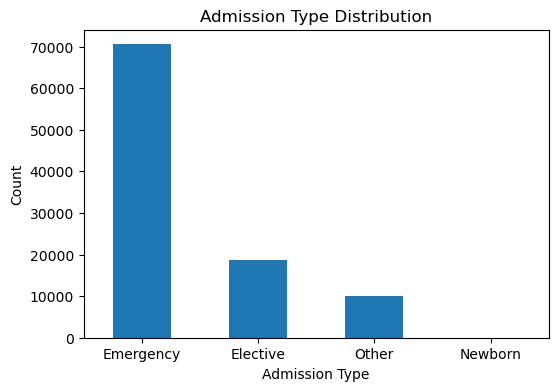

In [211]:
diabetes.rename(columns={'admission_type_id' : 'admission_type'}, inplace=True)

diabetes['admission_type'] = diabetes['admission_type'].replace({2: 1, 7: 1, 6: 5, 8: 5})
diabetes['admission_type'] = diabetes['admission_type'].replace({1 : "Emergency", 5 : "Other", 3 : "Elective", 4 : "Newborn"})

plt.figure(figsize=(6, 4))
diabetes['admission_type'].value_counts().plot(kind='bar')
plt.title("Admission Type Distribution")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

---
Zmienmy nazwy nastepujących kolumn

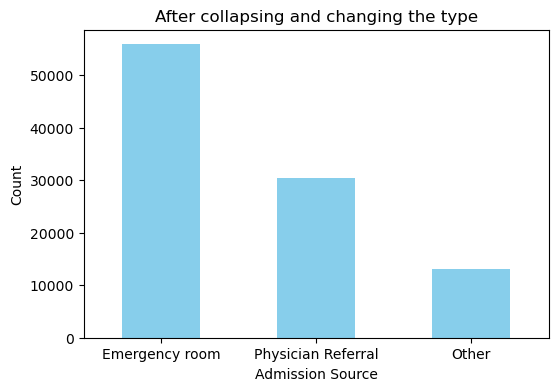

In [212]:
diabetes.rename(columns={'admission_source_id' : 'admission_source'}, inplace=True)

diabetes['admission_source'] = np.select(
    [diabetes['admission_source'].isin([1, 2, 3]), diabetes['admission_source'].isin([4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])],
    ["Physician Referral", "Other"],
    default="Emergency room"  # wszystkie pozostałe wartości
)

plt.figure(figsize=(6, 4))
diabetes['admission_source'].value_counts().plot(kind='bar', color='skyblue', edgecolor='none')
plt.title("After collapsing and changing the type")
plt.xlabel("Admission Source")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

---
Zmiana wartości w kolumnie discharge_disposition

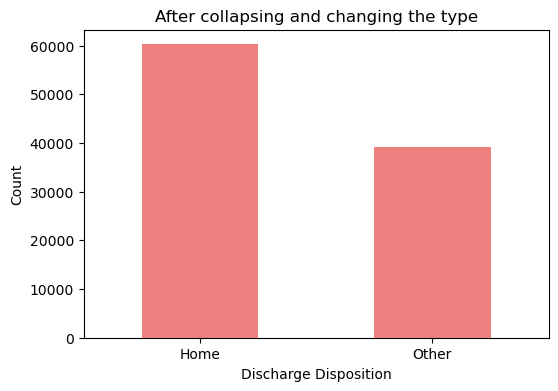

In [213]:
diabetes.rename(columns={'discharge_disposition_id' : 'discharge_disposition'}, inplace=True)

diabetes['discharge_disposition'] = np.where(diabetes['discharge_disposition'] == 1, "Home", "Other")

plt.figure(figsize=(6, 4))
diabetes['discharge_disposition'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='none')
plt.title("After collapsing and changing the type")
plt.xlabel("Discharge Disposition")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

---
Kolumna diag_1 zawiera informację o trzech diagnozach pacjenta (primary, secondary i additional). Niestety każdy z nich posiada ponad 700-900 unikatowych kodów ICD, co robi odkodowanie poszczególnej wartości dosyć trudnym do wykonania i wykorzystania w modelu. Z tego powodu, diagnozy zostały podzielone na 9 kategorii: Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, i Others

In [214]:
# konwersja kolumny na string
diabetes['diag_1'] = diabetes['diag_1'].astype(str)

# klasyfikacja diagnozy
def classify_diagnosis(diag):
    if diag.startswith('V') or diag.startswith('E'):
        return "Other"
    elif '250' in diag:
        return "Diabetes"
    else:
        try:
            code = int(diag)
            if 390 <= code <= 459 or code == 785:
                return "Circulatory"
            elif 460 <= code <= 519 or code == 786:
                return "Respiratory"
            elif 520 <= code <= 579 or code == 787:
                return "Digestive"
            elif 580 <= code <= 629 or code == 788:
                return "Genitourinary"
            elif 140 <= code <= 239:
                return "Neoplasms"
            elif 710 <= code <= 739:
                return "Musculoskeletal"
            elif 800 <= code <= 999:
                return "Injury"
            else:
                return "Other"
        except ValueError:  
            return "Other"


diabetes['primary_diagnosis'] = diabetes['diag_1'].apply(classify_diagnosis)

diabetes['primary_diagnosis'].value_counts()

primary_diagnosis
Circulatory        29681
Other              17813
Respiratory        13934
Digestive           9333
Diabetes            8661
Injury              6853
Genitourinary       5002
Musculoskeletal     4935
Neoplasms           3131
Name: count, dtype: int64

In [215]:
diabetes['primary_diagnosis'] = diabetes['primary_diagnosis'].astype('category')
diabetes.drop(['diag_1'], axis=1)

,patient_nbr,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,primary_diagnosis
0,8222157,Caucasian,Female,[0-10),Other,Other,Physician Referral,1,41,0,...,No,No,No,No,No,No,No,No,NO,Diabetes
1,55629189,Caucasian,Female,[10-20),Emergency,Home,Emergency room,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,Other
2,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,Emergency room,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,Other
3,82442376,Caucasian,Male,[30-40),Emergency,Home,Emergency room,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,Other
4,42519267,Caucasian,Male,[40-50),Emergency,Home,Emergency room,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,Neoplasms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),Emergency,Other,Emergency room,3,51,0,...,Down,No,No,No,No,No,Ch,Yes,>30,Diabetes
101762,74694222,AfricanAmerican,Female,[80-90),Emergency,Other,Other,5,33,3,...,Steady,No,No,No,No,No,No,Yes,NO,Digestive
101763,41088789,Caucasian,Male,[70-80),Emergency,Home,Emergency room,1,53,0,...,Down,No,No,No,No,No,Ch,Yes,NO,Other
101764,31693671,Caucasian,Female,[80-90),Emergency,Other,Emergency room,10,45,2,...,Up,No,No,No,No,No,Ch,Yes,NO,Injury


---
Kolumna age zawiera bardzo 

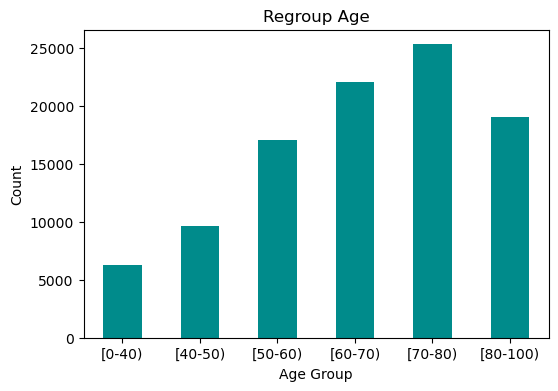

In [216]:
diabetes['age'] = diabetes['age'].replace('[0-10)', '[0-40)')
diabetes['age'] = diabetes['age'].replace('[10-20)', '[0-40)')
diabetes['age'] = diabetes['age'].replace('[20-30)', '[0-40)')
diabetes['age'] = diabetes['age'].replace('[30-40)', '[0-40)')

diabetes['age'] = diabetes['age'].replace('[80-90)', '[80-100)')
diabetes['age'] = diabetes['age'].replace('[90-100)', '[80-100)')

plt.figure(figsize=(6, 4))
diabetes['age'].value_counts().sort_index().plot(kind='bar', color='darkcyan', edgecolor='none')
plt.title("Regroup Age")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

---
Zmiana kategorii w kolumnie 'readmitted'

In [217]:
diabetes['readmitted'] = np.where(diabetes['readmitted'].isin(['>30', 'NO']), '0', '1')

diabetes['readmitted'] = diabetes['readmitted'].astype('category')

print(diabetes['readmitted'].cat.categories)

Index(['0', '1'], dtype='object')


In [218]:
# Funkcja do usuwania wartości odstających
def remove_outliers_zscore(df, threshold=3):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Wybór kolumn numerycznych
    z_scores = np.abs(df[numeric_cols].apply(zscore))  # Obliczenie Z-score
    df_clean = df[(z_scores < threshold).all(axis=1)]  # Usunięcie wierszy, gdzie z-score > threshold
    return df_clean

In [219]:
diabetes

,patient_nbr,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,primary_diagnosis
0,8222157,Caucasian,Female,[0-40),Other,Other,Physician Referral,1,41,0,...,No,No,No,No,No,No,No,No,0,Diabetes
1,55629189,Caucasian,Female,[0-40),Emergency,Home,Emergency room,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,0,Other
2,86047875,AfricanAmerican,Female,[0-40),Emergency,Home,Emergency room,2,11,5,...,No,No,No,No,No,No,No,Yes,0,Other
3,82442376,Caucasian,Male,[0-40),Emergency,Home,Emergency room,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,0,Other
4,42519267,Caucasian,Male,[40-50),Emergency,Home,Emergency room,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,0,Neoplasms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),Emergency,Other,Emergency room,3,51,0,...,Down,No,No,No,No,No,Ch,Yes,0,Diabetes
101762,74694222,AfricanAmerican,Female,[80-100),Emergency,Other,Other,5,33,3,...,Steady,No,No,No,No,No,No,Yes,0,Digestive
101763,41088789,Caucasian,Male,[70-80),Emergency,Home,Emergency room,1,53,0,...,Down,No,No,No,No,No,Ch,Yes,0,Other
101764,31693671,Caucasian,Female,[80-100),Emergency,Other,Emergency room,10,45,2,...,Up,No,No,No,No,No,Ch,Yes,0,Injury


In [220]:
# Usuwanie wartości odstających
diabetes = remove_outliers_zscore(diabetes)
diabetes

,patient_nbr,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,primary_diagnosis
1,55629189,Caucasian,Female,[0-40),Emergency,Home,Emergency room,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,0,Other
2,86047875,AfricanAmerican,Female,[0-40),Emergency,Home,Emergency room,2,11,5,...,No,No,No,No,No,No,No,Yes,0,Other
3,82442376,Caucasian,Male,[0-40),Emergency,Home,Emergency room,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,0,Other
4,42519267,Caucasian,Male,[40-50),Emergency,Home,Emergency room,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,0,Neoplasms
5,82637451,Caucasian,Male,[50-60),Emergency,Home,Physician Referral,3,31,6,...,Steady,No,No,No,No,No,No,Yes,0,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,50375628,AfricanAmerican,Female,[60-70),Emergency,Home,Emergency room,6,45,1,...,Down,No,No,No,No,No,Ch,Yes,0,Other
101761,100162476,AfricanAmerican,Male,[70-80),Emergency,Other,Emergency room,3,51,0,...,Down,No,No,No,No,No,Ch,Yes,0,Diabetes
101762,74694222,AfricanAmerican,Female,[80-100),Emergency,Other,Other,5,33,3,...,Steady,No,No,No,No,No,No,Yes,0,Digestive
101763,41088789,Caucasian,Male,[70-80),Emergency,Home,Emergency room,1,53,0,...,Down,No,No,No,No,No,Ch,Yes,0,Other


In [221]:
def plot_numerical_data_summary_statystyki(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df_num = df[num_cols]
    desc_stats = df_num.describe().T
    print("Statystykif opisowe:")
    print(desc_stats)

plot_numerical_data_summary_statystyki(diabetes)

Statystykif opisowe:
                      count          mean           std    min         25%  \
patient_nbr         92119.0  5.302197e+07  3.724313e+07  135.0  23332041.0   
time_in_hospital    92119.0  4.229204e+00  2.786042e+00    1.0         2.0   
num_lab_procedures  92119.0  4.248986e+01  1.945537e+01    1.0        31.0   
num_procedures      92119.0  1.293989e+00  1.663984e+00    0.0         0.0   
num_medications     92119.0  1.540916e+01  7.102820e+00    1.0        10.0   
number_outpatient   92119.0  2.549963e-01  7.124227e-01    0.0         0.0   
number_emergency    92119.0  1.281820e-01  4.298208e-01    0.0         0.0   
number_inpatient    92119.0  4.983120e-01  8.784771e-01    0.0         0.0   
number_diagnoses    92119.0  7.364550e+00  1.924168e+00    2.0         6.0   

                           50%         75%          max  
patient_nbr         44556408.0  86740443.0  170447693.0  
time_in_hospital           4.0         6.0         13.0  
num_lab_procedures      

### b)Wizualizacje danych
---
#### Funkcje pomocnicze:

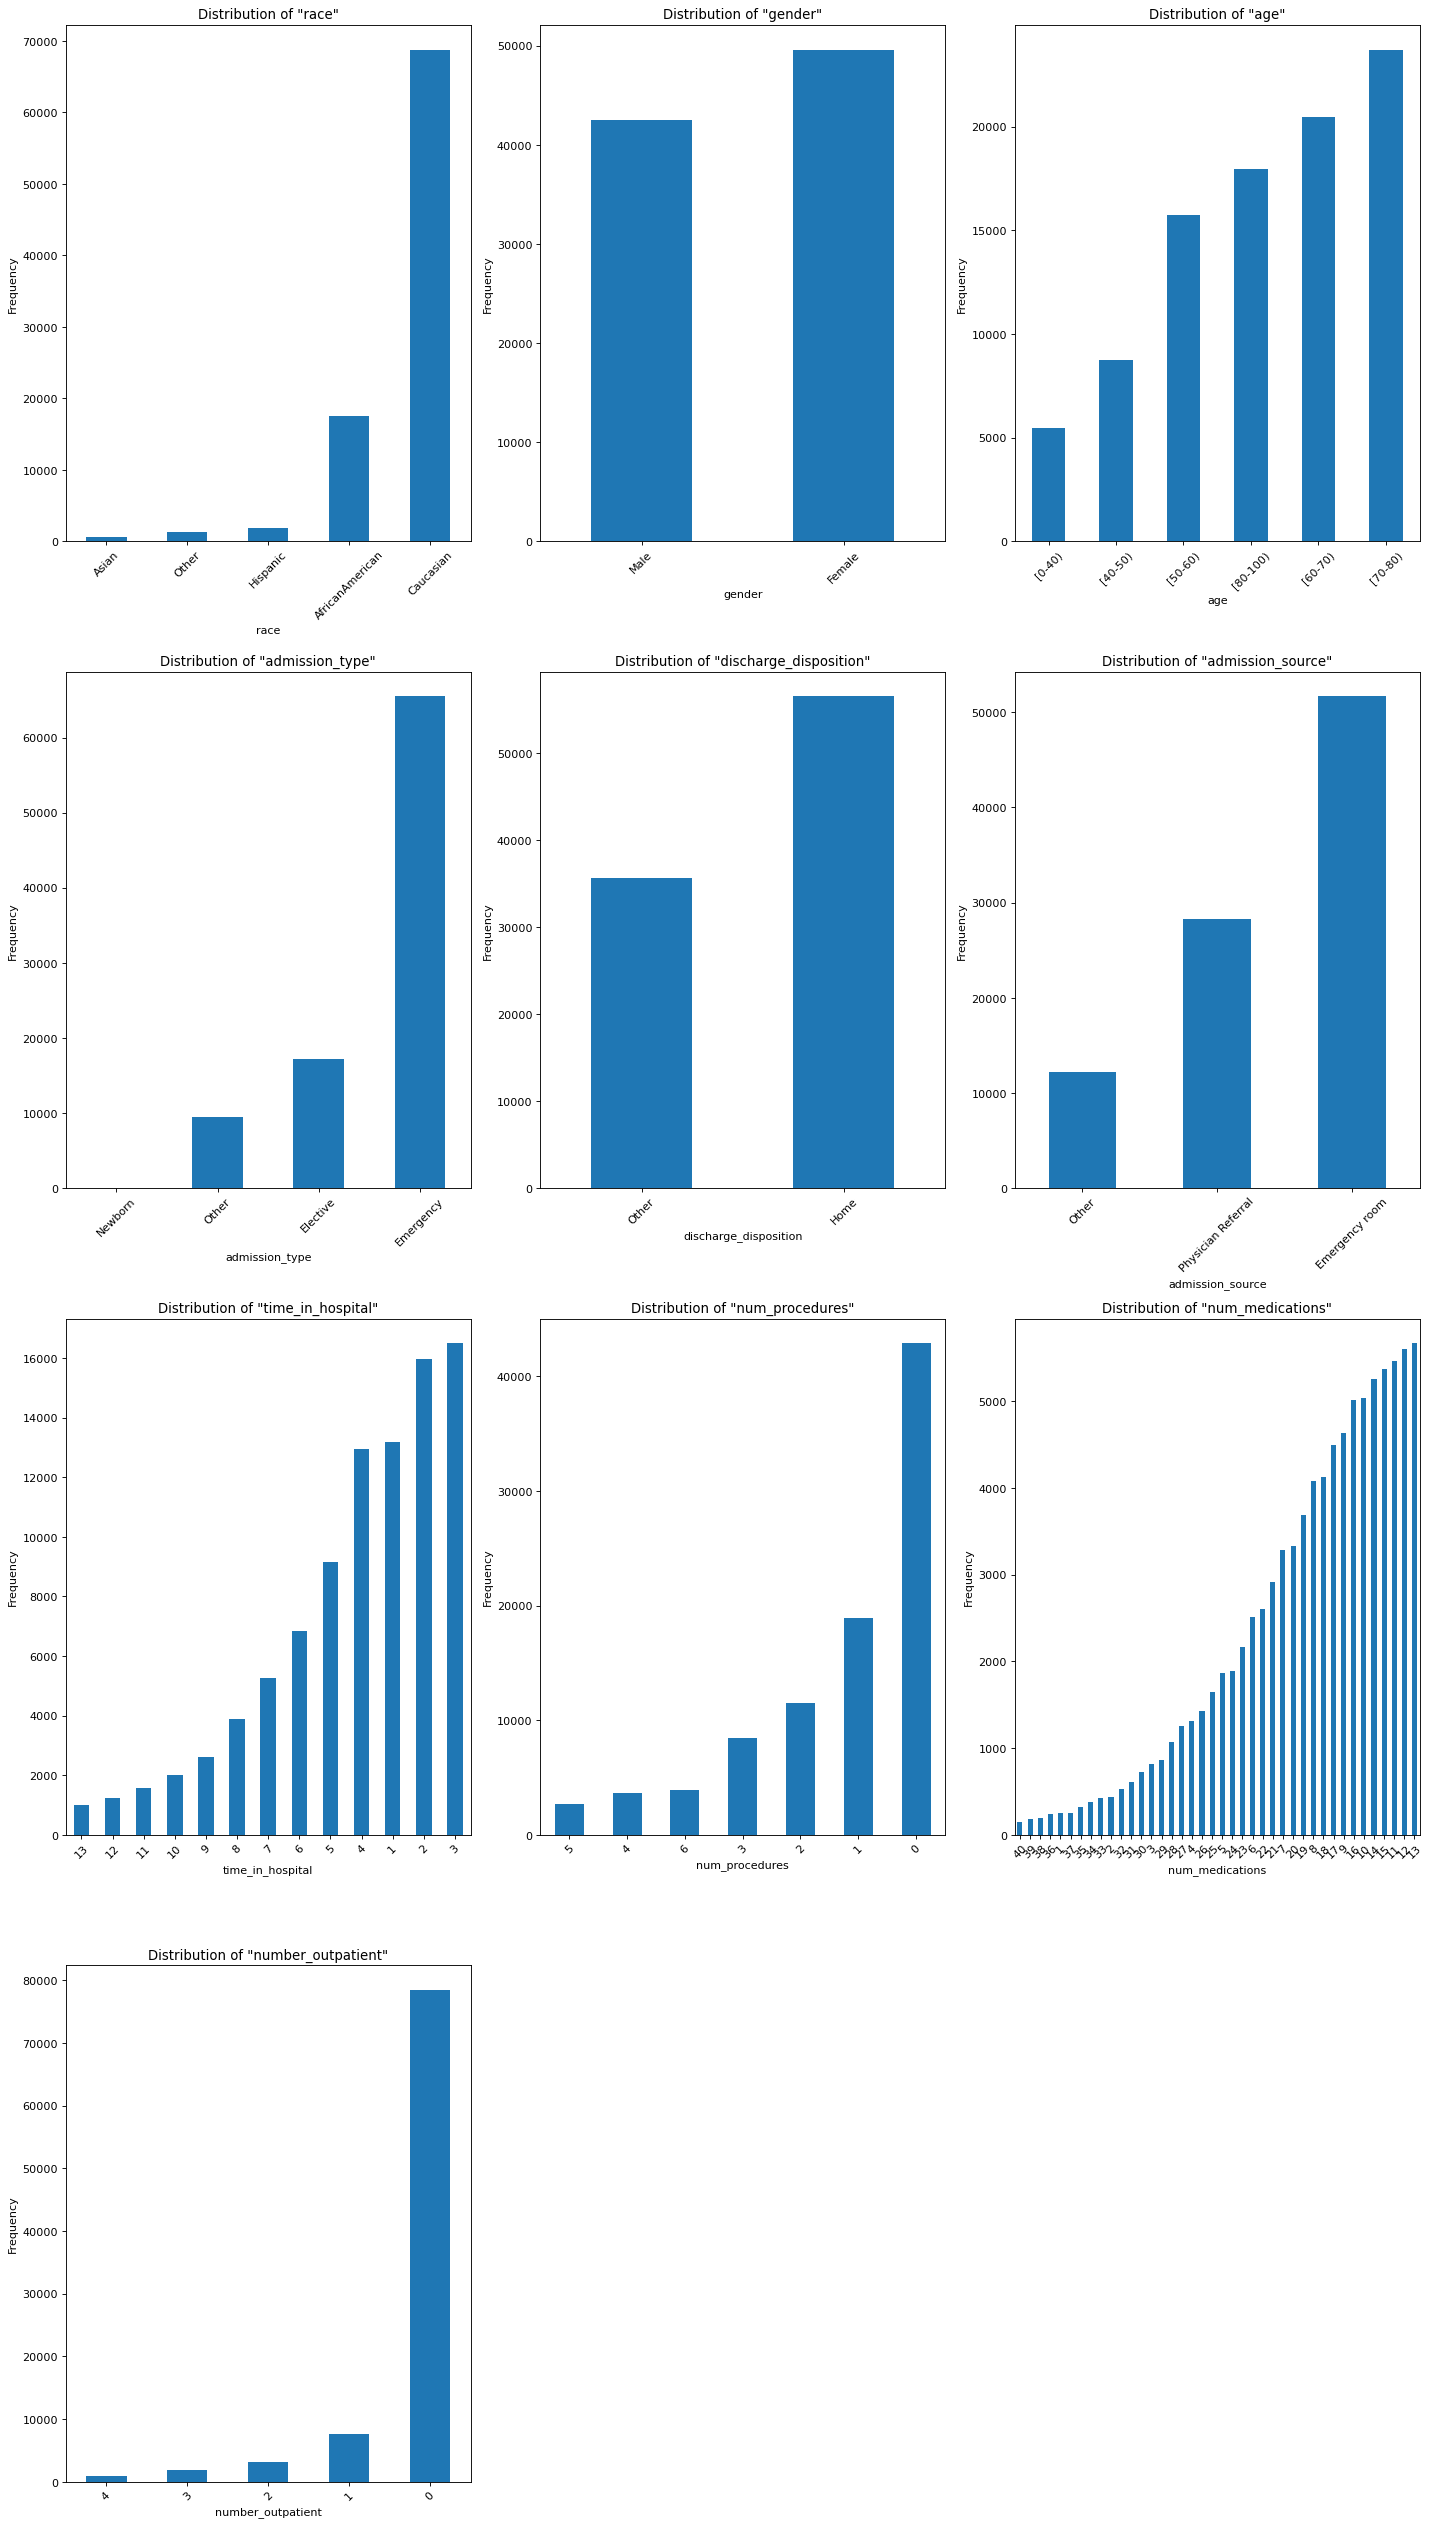

In [222]:
def visualize_column_distributions(dataframe, max_graphs_displayed, graphs_per_row):
    selected_columns = [col for col in dataframe if 2 <= dataframe[col].nunique() <= 50]
    filtered_df = dataframe[selected_columns]
    total_columns = len(selected_columns)

    rows_required = math.ceil(total_columns / graphs_per_row)
    plt.figure(figsize=(6 * graphs_per_row, 8 * rows_required), dpi=80)
    for idx, column in enumerate(selected_columns[:max_graphs_displayed]):
        plt.subplot(rows_required, graphs_per_row, idx + 1)
        column_data = filtered_df[column]

        if column_data.dtype == 'object' or column_data.nunique() < 10:
            value_counts = column_data.value_counts(ascending=True)
            value_counts.sort_values(inplace=True)
            value_counts.plot(kind='bar')
        else:
            sorted_data = column_data.value_counts(ascending=True)
            sorted_data.sort_values(inplace=True)
            sorted_data.plot(kind='bar')

        plt.title(f'Distribution of "{column}"', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
visualize_column_distributions(diabetes, 10, 3)

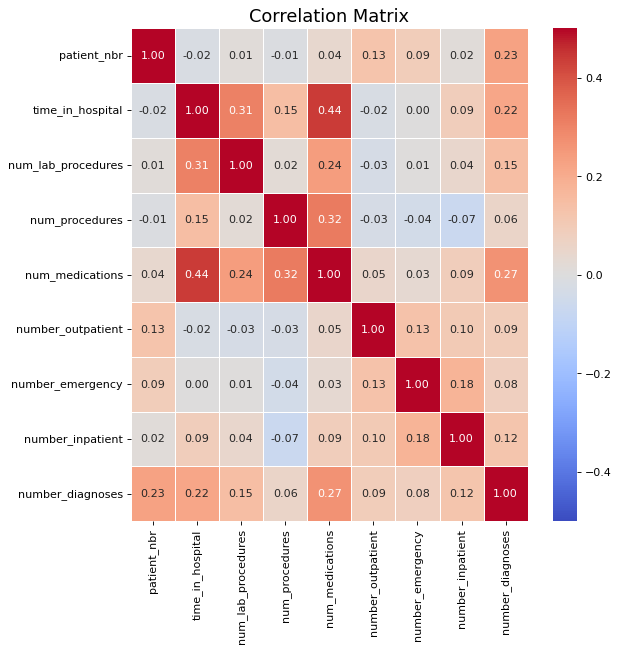

In [223]:
def custom_correlation_heatmap(df, figure_size):
    filename = getattr(df, "dataframeName", "Unnamed DataFrame")
    df_numeric = df.select_dtypes(include=[np.number]).dropna(axis='columns')
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]
    
    if df_numeric.shape[1] < 2:
        print(f'Skipping correlation plot: The number of columns with non-NaN and non-constant values ({df_numeric.shape[1]}) is less than 2.')
        return

    corr_matrix = df_numeric.corr()
    
    plt.figure(figsize=(figure_size, figure_size), dpi=80)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-0.5, vmax=0.5)
    
    plt.title(f'Correlation Matrix', fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    
    plt.show()


custom_correlation_heatmap(diabetes, figure_size=8)


In [229]:
# One-Hot Encoding dla kolumn kategorycznych
categorical_cols = diabetes.select_dtypes(include=["object", "category"]).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != "readmitted"]  # Wyklucz 'readmitted'
df = pd.get_dummies(diabetes, columns=categorical_cols)

# Podział na cechy (X) i etykietę (y)
X = df.drop(columns=["readmitted"])  # Wybór zmiennych niezależnych
y = df["readmitted"]  # Zmienna zależna

# Konwersja y na numeryczną (Label Encoding)
le = LabelEncoder()
y = le.fit_transform(y)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [230]:
# Skalowanie cech (ważne dla Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
# Oversampling za pomocą SMOTE
smote = SMOTE(random_state=100)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [232]:
# Model 1: Random Forest z class_weight
rf_model = RandomForestClassifier(n_estimators=100, random_state=100, class_weight="balanced")
rf_model.fit(X_train_res, y_train_res)

# Predykcja na zbiorze testowym
y_pred_rf = rf_model.predict(X_test)

# Ocena modelu Random Forest
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest - AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Random Forest - Accuracy: 0.8905775075987842
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     16433
           1       0.33      0.01      0.02      1991

    accuracy                           0.89     18424
   macro avg       0.61      0.50      0.48     18424
weighted avg       0.83      0.89      0.84     18424

Random Forest - Confusion Matrix:
 [[16384    49]
 [ 1967    24]]
Random Forest - AUC-ROC: 0.6187631660674214


In [233]:
# Logistic Regression z 10-krotną walidacją krzyżową
lr_model = LogisticRegression(max_iter=1000, random_state=100, class_weight="balanced")

# Ocena modelu za pomocą 10-folds cross-validation
cv_scores = cross_val_score(lr_model, X_train_res, y_train_res, cv=10, scoring="accuracy")  # Można zmienić scoring na "roc_auc", "f1", itp.

# Wyniki walidacji krzyżowej
print("Logistic Regression - 10-folds CV Accuracy Scores:", cv_scores)
print("Logistic Regression - Mean CV Accuracy:", cv_scores.mean())
print("Logistic Regression - Std CV Accuracy:", cv_scores.std())

# Trenowanie modelu na pełnym zbiorze danych (po SMOTE)
lr_model.fit(X_train_res, y_train_res)

# Predykcja na zbiorze testowym (jeśli chcesz ocenić na osobnym zbiorze testowym)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
y_pred_lr = lr_model.predict(X_test)

# Ocena modelu na zbiorze testowym
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Test Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression - Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression - Test AUC-ROC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

Logistic Regression - 10-folds CV Accuracy Scores: [0.61187562 0.62989432 0.63772523 0.64289516 0.63088269 0.64084239
 0.63458029 0.63670925 0.64233577 0.63602494]
Logistic Regression - Mean CV Accuracy: 0.6343765654241869
Logistic Regression - Std CV Accuracy: 0.008577448185440484
Logistic Regression - Test Accuracy: 0.8919887103777682
Logistic Regression - Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     16433
           1       1.00      0.00      0.00      1991

    accuracy                           0.89     18424
   macro avg       0.95      0.50      0.47     18424
weighted avg       0.90      0.89      0.84     18424

Logistic Regression - Test Confusion Matrix:
 [[16433     0]
 [ 1990     1]]
Logistic Regression - Test AUC-ROC: 0.5005179089997974


In [112]:
print(df.columns)

Index(['patient_nbr', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican',
       ...
       'readmitted_1', 'primary_diagnosis_Circulatory',
       'primary_diagnosis_Diabetes', 'primary_diagnosis_Digestive',
       'primary_diagnosis_Genitourinary', 'primary_diagnosis_Injury',
       'primary_diagnosis_Musculoskeletal', 'primary_diagnosis_Neoplasms',
       'primary_diagnosis_Other', 'primary_diagnosis_Respiratory'],
      dtype='object', length=836)
